In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2, random, tempfile, requests
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
model_size = ["n", "s", "m", "l", "x"][0]

### 通常の物体検出モデル
# model = YOLO(f"./models/yolov8{model_size}.pt")

### インスタンスセグメンテーションのモデル
model = YOLO(f"./models/yolov8{model_size}-seg.pt")

### Keypoint検出（骨格検出）のモデル
# model = YOLO(f"./models/yolov8{model_size}-pose")


# 自作モデル
# model = YOLO(f"./__output_yolov8__/20230615-1346_yolov8n_nakane_grape1/weights/best.pt")

100%|██████████| 6.73M/6.73M [00:00<00:00, 8.64MB/s]



WARNING  SegmentationModel has not supported augment inference yet! Now using single-scale inference instead.
0: 448x640 1 dog, 122.6ms
Speed: 4.2ms preprocess, 122.6ms inference, 8.0ms postprocess per image at shape (1, 3, 448, 640)
WARNING  'Masks.masks' is deprecated. Use 'Masks.data' instead.
WARNING  'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead.


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

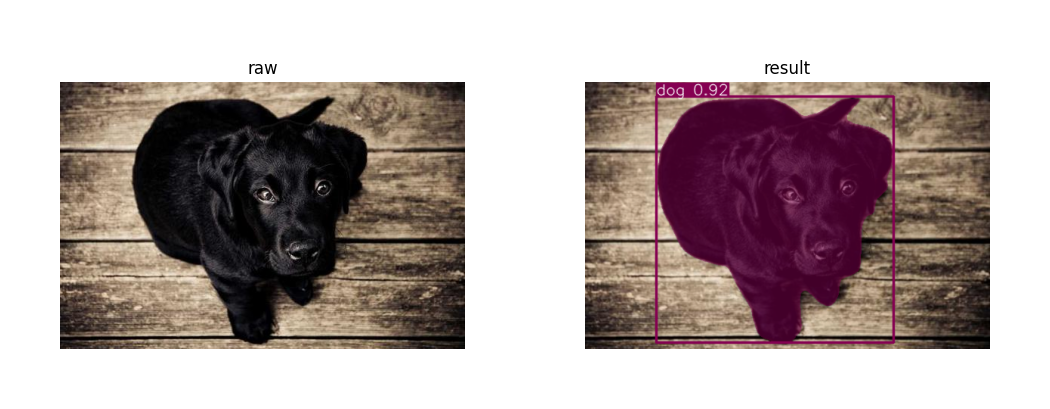

In [16]:
imgs = {}

# sample_img_url = "https://picsum.photos/512"
# imgs["raw"] = utils.imread_web(sample_img_url)[:, :, ::-1]

# imgs["raw"] = cv2.imread("./dataset/sample_dataset/coco_dataset/NON0339_0077.jpg")[:,:,::-1]

img_dir = Path("./dataset/sample_dataset/sample_jpg/")
sample_imgPath = random.choice(list(img_dir.glob("*.jpg")))
imgs["raw"] = cv2.imread(str(sample_imgPath))[:,:,::-1]

print(model.names)

result = model(
                source    = imgs["raw"],
                conf      = 0.7,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )

imgs["result"] = result[0].plot()

utils.show_imgs(imgs, dpi=600, font_scale=0.2)